<a href="https://colab.research.google.com/github/lakshitgosain/Transformers-for-NLP/blob/main/Transformers_A01_Question_Answering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question Answering

## SQuAD

Stanford Quetion Answering context
- We have a constraint- It is not an ask anything model
- We do an extractive Question-answering- We give the context to the model in the question from where it extracts the answers
- Network does not generate text by itself

In [1]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.5 MB/s eta 0:00:00


The answer to the question can be multiple

In [2]:
from datasets import load_dataset
raw_datasets=load_dataset('squad')


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [4]:
raw_datasets['train'][1]['title']

'University_of_Notre_Dame'

In [5]:
raw_datasets['train'][1]['context']

'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.'

In [6]:
raw_datasets['train'][1]['question']

'What is in front of the Notre Dame Main Building?'

In [7]:
raw_datasets['train'][1]['answers']

{'text': ['a copper statue of Christ'], 'answer_start': [188]}

In [8]:
raw_datasets['train'].filter(lambda x: len(x['answers']['text'])!=1)

Filter:   0%|          | 0/87599 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 0
})

The above means that every row in the dataset has exactly 1 answer

In [9]:
raw_datasets['validation'][2]['answers']

{'text': ['Santa Clara, California',
  "Levi's Stadium",
  "Levi's Stadium in the San Francisco Bay Area at Santa Clara, California."],
 'answer_start': [403, 355, 355]}

In [10]:
raw_datasets['validation'][2]['context']

'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.'

In [11]:
raw_datasets['validation'][2]['question']

'Where did Super Bowl 50 take place?'

Validation set has qustions with multiple answers

##Tokenizer

We send the questin first and then the context next

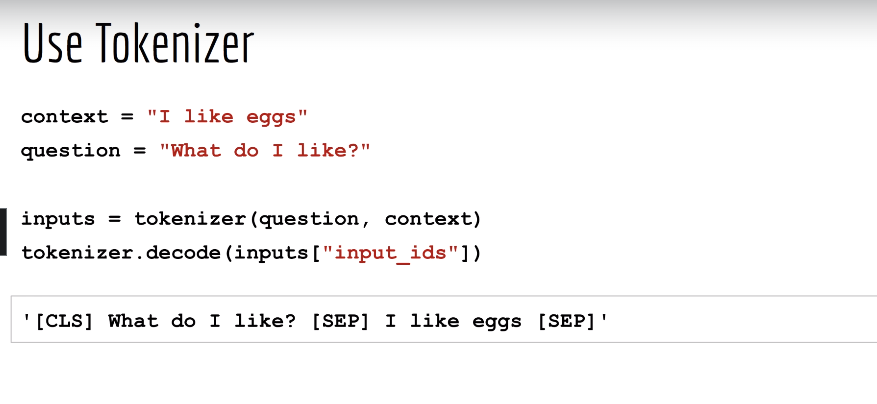

For long sentences, we may have a problem.
- BERT can handle only a limited number of tokens.

Sol is split the context into multiple set of windows.
-Use overlapping windows to get an answer which exist in end of window 1 and start of window 2 (THis is definder by the argumenr stride in the Tokenizer call)

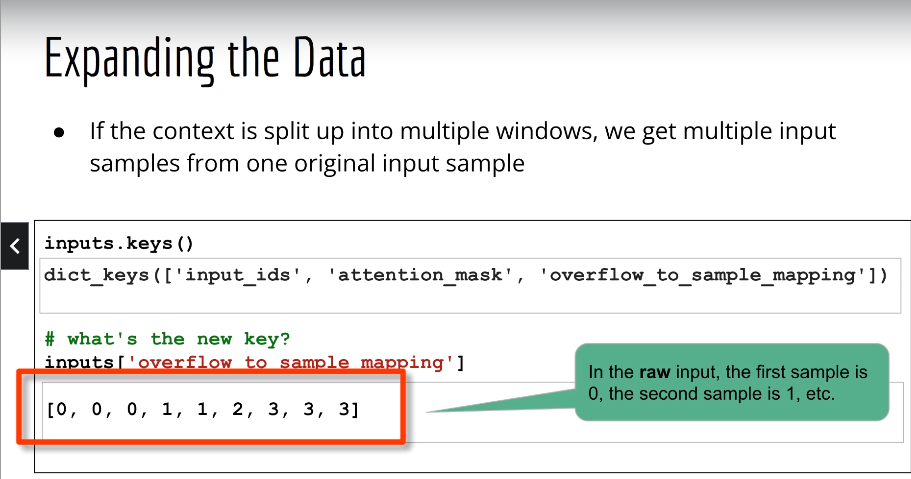

return ofsset mappings(TRUE)- We will get an additional output token- it's going to give a list of tuples which corresponds to the token in the input sequence . it has start and end token position in the tuple  

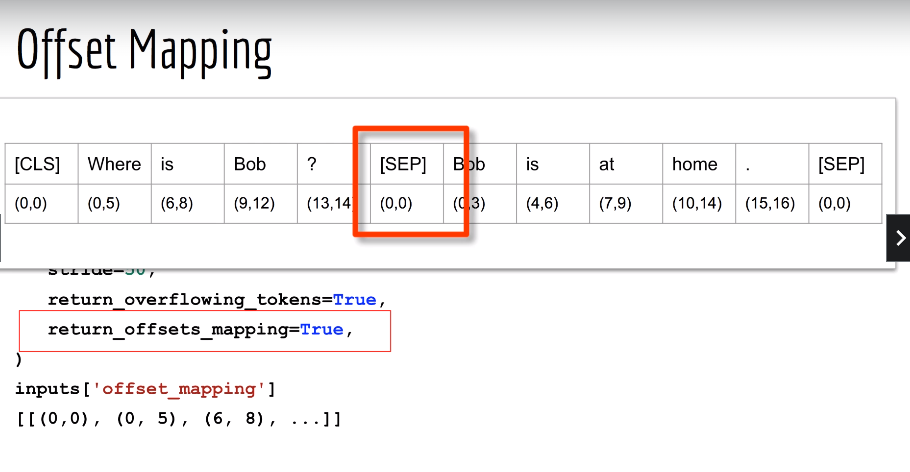

In [12]:
from transformers import AutoTokenizer
checkpoint='distilbert-base-cased'
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

In [13]:
context=raw_datasets['train'][1]['context']
question=raw_datasets['train'][1]['question']

In [14]:
inputs=tokenizer(question, context)
tokenizer.decode(inputs['input_ids'])

'[CLS] What is in front of the Notre Dame Main Building? [SEP] Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive ( and in a direct line that connects through 3 statues and the Gold Dome ), is a simple, modern stone statue of Mary. [SEP]'

In [15]:
#What if the context is really long.
#Split it inot multiple samples
inputs=tokenizer(
    question,
    context,
    max_length=100,
    truncation='only_second',
    stride=50,
    return_overflowing_tokens=True,

)

for ids in inputs['input_ids']:
  print(tokenizer.decode(ids))

[CLS] What is in front of the Notre Dame Main Building? [SEP] Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the G [SEP]
[CLS] What is in front of the Notre Dame Main Building? [SEP] facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernade [SEP]
[CLS] What is in front of the Notre Dame Main Building? [SEP] of the Sacred Heart. Immediately behind the basilica is the Grotto, 

In [16]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'overflow_to_sample_mapping'])

In [17]:
inputs['overflow_to_sample_mapping']

[0, 0, 0, 0]

when we split the context, we get multiple samples, but we need to know from where the original sample index came from

In [18]:
inputs=tokenizer(
    raw_datasets['train'][:3]['question'],
    raw_datasets['train'][:3]['context'],
    max_length=100,
    truncation='only_second',
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True

)

In [19]:
inputs['overflow_to_sample_mapping']

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]

In [20]:
#It points to the original sample index
for ids in inputs['input_ids']:
  print(tokenizer.decode(ids))

[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? [SEP] Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basi [SEP]
[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? [SEP] the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin [SEP]
[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? [SEP] Next to the Main Building is the B

In [21]:

#recreate inputs just for a single question-context pair
inputs=tokenizer(
    question,
    context,
    max_length=100,
    truncation='only_second',
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True

)

In [22]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])

In [23]:
inputs['offset_mapping']
#It tells the location of each token
#Notes: Special tokens takes up 0 space- (0,0)
#The question potrion is the same for each sample
#The context portion starting point increases in each sample

[[(0, 0),
  (0, 4),
  (5, 7),
  (8, 10),
  (11, 16),
  (17, 19),
  (20, 23),
  (24, 29),
  (30, 34),
  (35, 39),
  (40, 48),
  (48, 49),
  (0, 0),
  (0, 13),
  (13, 15),
  (15, 16),
  (17, 20),
  (21, 27),
  (28, 31),
  (32, 33),
  (34, 42),
  (43, 52),
  (52, 53),
  (54, 56),
  (56, 58),
  (59, 62),
  (63, 67),
  (68, 76),
  (76, 77),
  (77, 78),
  (79, 83),
  (84, 88),
  (89, 91),
  (92, 93),
  (94, 100),
  (101, 107),
  (108, 110),
  (111, 114),
  (115, 121),
  (122, 126),
  (126, 127),
  (128, 139),
  (140, 142),
  (143, 148),
  (149, 151),
  (152, 155),
  (156, 160),
  (161, 169),
  (170, 173),
  (174, 180),
  (181, 183),
  (183, 184),
  (185, 187),
  (188, 189),
  (190, 196),
  (197, 203),
  (204, 206),
  (207, 213),
  (214, 218),
  (219, 223),
  (224, 226),
  (226, 229),
  (229, 232),
  (233, 237),
  (238, 241),
  (242, 248),
  (249, 250),
  (250, 251),
  (251, 254),
  (254, 256),
  (257, 259),
  (260, 262),
  (263, 264),
  (264, 265),
  (265, 268),
  (268, 269),
  (269, 270),
 

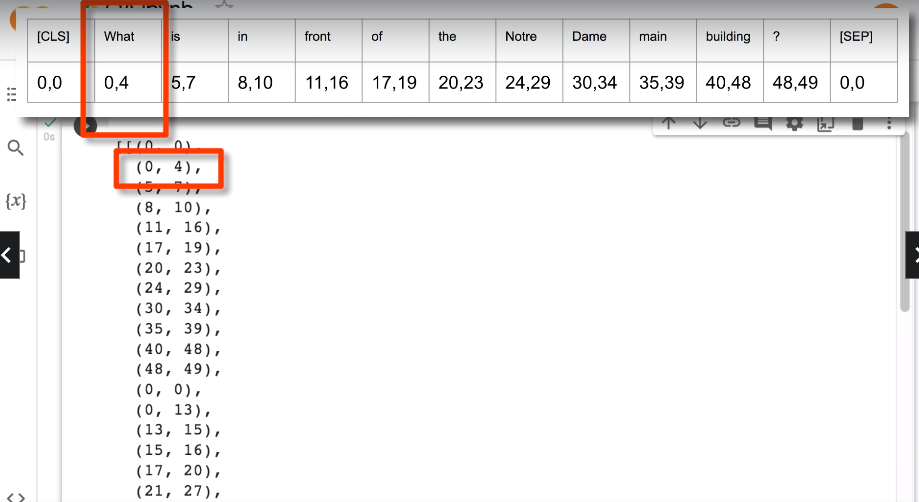

In [24]:
len(inputs['offset_mapping'])

4

In [25]:
len(inputs['offset_mapping'][0])

100

In [26]:
print(inputs.sequence_ids(0))

[None, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None]


## Aligning the targets

Answer in the dataset comes with a start position. After we split the context, the position no longer exist and is not valid
- FOr some wnidows, the answer may not exist , or only exist in parts

- Treat QA as a classification task- pick th correct timestep for the answer

**Sequence IDs**

- similar to token ids
- None, 0, 1....

**Where is the context?**

- We need the index of the first 1 and index of the last 1

**Finding the answer**
- Suppose we have a context windowm how do we find the start/emnd character position of the answer

- We have the context whindows, how do we find the answer
- 2 things-
--Offset mappings , context Start+ context end
- Offset mapping is the list of tuples, containing the character positions of token start/ends


We need to deal with 2 types of units-
Indices of the tokens and indices of the charactrs. Neural Networks work with tokens
Dataset gives answers in the character index

In [28]:
print(inputs.sequence_ids(0))

[None, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, None]


In [29]:
#Problem : the position of the answer will change in each window of the context
# THe answer is also the target for the neural netwoek. We need to recompute the targets fo each context window

answer=raw_datasets['train'][1]['answers']
answer

{'text': ['a copper statue of Christ'], 'answer_start': [188]}

In [30]:
type(inputs.sequence_ids(0))

list

In [31]:
#Find the start and end of the context (first and last '1')
sequence_ids= inputs.sequence_ids(0)

ctx_start=sequence_ids.index(1) #First index of the first 1
ctx_end=len(sequence_ids)- sequence_ids[::-1].index(1)-1 #Last occurance of 1

ctx_start, ctx_end

(13, 98)

In [33]:
#Check whether or not the answer is fully contained within the context
#if not, target is (start, end)=(0,0)

ans_start_char=answer['answer_start'][0]
ans_end_char=ans_start_char+ len(answer['text'][0])

offset= inputs['offset_mapping'][0]

start_idx=0
end_idx=0

if offset[ctx_start][0]> ans_start_char or offset[ctx_end][1]<ans_end_char:
  print("target is (0,0)")
  #Noting else tp do
else:
  #ind the start and end token positins
  #The trick is knowing what is in units of tokens and what is in units of characters
  #Recall: The offset mappings contains the character mappings of each token

  i=ctx_start

  for start_end_char in offset[ctx_start:]:
    start, end= start_end_char
    if start==ans_start_char:
      start_idx=i
    if end==ans_end_char:
      end_idx=i
      break

    i+=1

start_idx, end_idx


(53, 57)

In [35]:
input_ids= inputs['input_ids'][0]
input_ids[start_idx:end_idx+1]

[170, 7335, 5921, 1104, 4028]

In [36]:
tokenizer.decode(input_ids[start_idx:end_idx+1])

'a copper statue of Christ'

In [37]:
def find_answer_token_idx(
    ctx_start,
    ctx_end,
    ans_ctart_char,
    ans_end_char,
    offset
):

  start_idx=0
  end_idx=0

  if offset[ctx_start][0]> ans_start_char or offset[ctx_end][1]<ans_end_char:
    pass
    #print("target is (0,0)")
    #Noting else tp do
  else:
    #ind the start and end token positins
    #The trick is knowing what is in units of tokens and what is in units of characters
    #Recall: The offset mappings contains the character mappings of each token

    i=ctx_start

    for start_end_char in offset[ctx_start:]:
      start, end= start_end_char
      if start==ans_start_char:
        start_idx=i
      if end==ans_end_char:
        end_idx=i
        break

      i+=1

  return start_idx, end_idx

In [40]:
start_idxs=[]
end_idxs=[]

for i, offset in enumerate(inputs['offset_mapping']):

  sequence_ids=inputs.sequence_ids(i)

  ctx_start=sequence_ids.index(1)
  ctx_end=len(sequence_ids)-sequence_ids[::-1].index(1)-1

  start_idx, end_idx= find_answer_token_idx(
      ctx_start,
      ctx_end,
      ans_start_char,
      ans_end_char,
      offset
  )

  start_idxs.append(start_idx)
  end_idxs.append(end_idx)
start_idxs, end_idxs

target is (0,0)
target is (0,0)


([53, 17, 0, 0], [57, 21, 0, 0])